<a href="https://colab.research.google.com/github/18K41A0278SALMAN/NNDL278/blob/main/assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
load_data = pd.read_excel("/content/Load Data in kW.xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [ ]:
type(load_data)
data = load_data.rename(columns={5551.82208:'load'},inplace=False)
data.head()

,load
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [ ]:
data.describe()

,load
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   load    2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


validitating null value

In [ ]:
data.isnull().sum()

load    0
dtype: int64

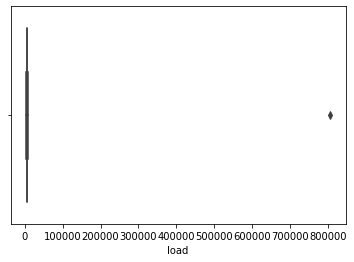

In [ ]:
sns.boxplot(x=data['load'])

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928]),)


In [ ]:
data.iloc[928,0] = data.iloc[927,0]

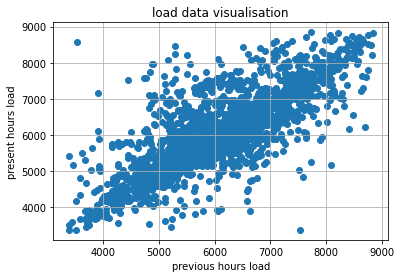

In [ ]:
data_x = []
data_y = []
for i in range(0,len(data)-1):
  data_x.append(data.iloc[i,0])
  data_y.append(data.iloc[i+1,0])
plt.scatter(data_x,data_y)
plt.title("load data visualisation")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()

In [ ]:
data_xx = pd.DataFrame(data_x)
min_x = float(data_xx.min())
max_x = float(data_xx.max())
data_yy = pd.DataFrame(data_y)
min_y = float(data_yy.min())
max_y = float(data_yy.max())
print(min_x)
print(min_y)
print(max_x)
print(max_y)

3377.9196
3377.9196
805444.4304000001
805444.4304000001


data normilasition


In [ ]:
x = minmax_scale(data_x)
y = minmax_scale(data_y)
data_norm = []
for i in range(len(data)-24):
  data_norm.append([x[i],y[i]])

data_norm = pd.DataFrame(data_norm)
data_norm

,0,1
0,0.293800,0.276454
1,0.276454,0.310234
2,0.310234,0.332801
3,0.332801,0.414254
4,0.414254,0.690965
...,...,...
2154,0.231719,0.445808
2155,0.445808,0.684146
2156,0.684146,0.514679
2157,0.514679,0.417306


splitting dats set

In [ ]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(data_norm,test_size=0.1)

In [ ]:
data_x = np.array(data_train[0])
data_y = np.array(data_train[1])
len(data_x)

1943

In [ ]:
##training model

In [ ]:
#STEP 2: initialising required parameters
m = 1
c = -1
iter = 1
epochs = 2000
alpha = 0.1
ns = len(data_train)
error = []
vm = 0
vc = 0
moment = 0.9
# while loop is runned until iter reaches epochs
while (iter<=epochs):
  # running for loop to calculate and update model parameters for each sample
  for i in range(0,len(data_train)):
    # calculating derivatives of m and c
    der_m = (-1) * (data_y[i] - ((m+(moment*vm))*data_x[i]) - (c+(moment*vc)))*(data_x[i])
    der_c = (-1) * (data_y[i] - ((m+(moment*vm))*data_x[i]) - (c+(moment*vc)))
    # print("derivatives at ",i,"   ",der_m,der_c)

    # calculating change in m and c
    vm = (moment * vm) - (alpha * der_m)
    vc = (moment * vc) - (alpha * der_c)
    # print("changes at ",i,vm,vc)

    #updating m and c
    m = m + vm
    c = c + vc
    # print("values at",i,m,c)

  err=0
  for i in range(0,len(data_train)):
    err+=((data_y[i] - (m * data_x[i]) - c))**2
  err = (1/(2*len(data_train))) * err
  error.append(err)
    #incrementing no of iterations
  iter = iter + 1
 

  
print(m,c)

0.7228685791541364 -0.0015303567478556022


In [ ]:
iters = np.arange(epochs)
from sklearn.metrics import mean_squared_error
pred = []
for i in range(len(data_train)):
  pred.append(m*data_x[i] + c)
mse_train = mean_squared_error(data_y,pred)

In [ ]:
data_test

,0,1
773,0.345211,0.206157
2150,0.061510,0.064763
693,0.436222,0.448860
743,0.381159,0.400502
848,0.386009,0.569684
...,...,...
2000,0.652763,0.605689
1700,0.580583,0.574306
1850,0.420530,0.370318
1307,0.793586,0.762489


In [ ]:
pred_test = m*data_test[0] + c
mse_test = mean_squared_error(data_test[1],pred_test)

mean square error

In [ ]:
print("training data mean squared error:",mse_train)
print("Testing data mean squared error:",mse_test)
print("model parameter:",m,c)

training data mean squared error: 0.03385364820681222
Testing data mean squared error: 0.030170513104437743
model parameter: 0.7228685791541364 -0.0015303567478556022


visulaising data

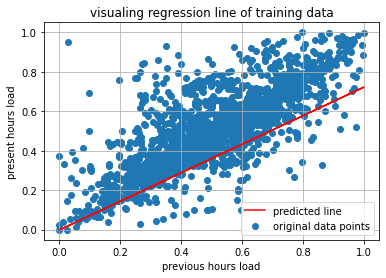

In [ ]:

plt.scatter(data_train[0],data_train[1],label="original data points")
plt.plot(data_train[0],pred,color='red',label="predicted line")
plt.title("visualing regression line of training data")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()
plt.legend()

viasulising test data

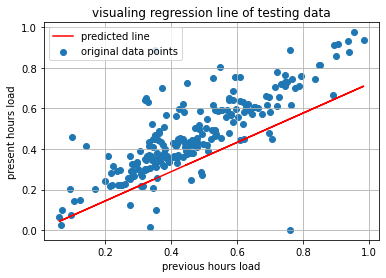

In [ ]:
plt.scatter(data_test[0],data_test[1],label="original data points")
plt.plot(data_test[0],pred_test,color='red',label="predicted line")
plt.title("visualing regression line of testing data")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()
plt.legend()

deployment of data

In [ ]:
input_load = float(input("enter yesterday load at this time : "))
input_load = (input_load - min_x)/(max_x-min_x)
output_load = input_load*m+c

output_load = output_load*(max_y-min_y)+min_y

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 4569.23
predicted load for this hour is :  3011.632559147767
